<a href="https://colab.research.google.com/github/SamHSlva/BasicMachineLearningPytorch/blob/main/Basic_Implementations_001_Neural_Network_MNIST_CIFAR10_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Basic - Deep Neural Networks

Deep Neural Networks are universal function approximators. 

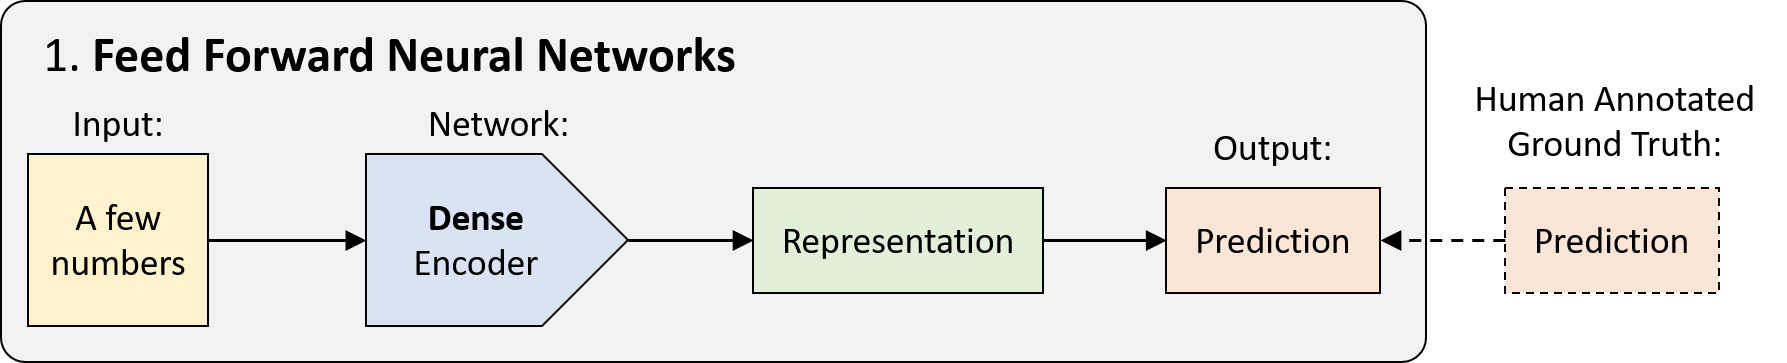


In machine learning, you start by defining a task and a model. The model consists of an architecture and parameters. For a given architecture, the values of the parameters determine how accurately the model performs the task.

Feed Forward Networks are composed of layers of neurons, and activation functions which allow the model to optimize the parameters for the required task.

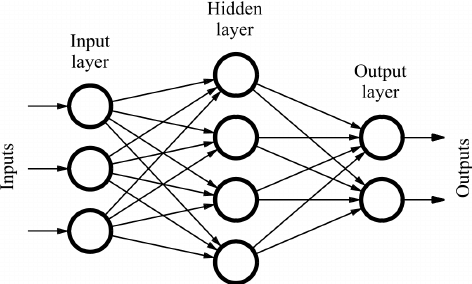

Source: [deepai.org]

Each neuron represented by a circle perform a linear transformation, followed by a non-linear activation.

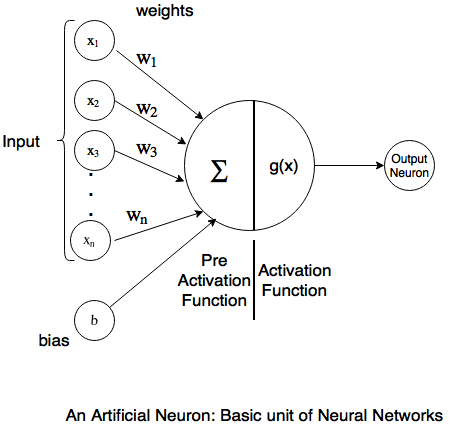

Source: [https://medium.com/@akankshamalhotra24/tutorial-on-feedforward-neural-network-part-1-659eeff574c3]

Now we construct, our basic layer structure using Pytorch API's.


In [34]:
class Net(nn.Module):

    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc = nn.Sequential(nn.Linear(input_size, input_size//2), ## A first linear layer that gets an input of input_size, and generate an output half the size.
                                nn.BatchNorm1d(input_size//2),
                                nn.Dropout(p=0.3),
                                nn.ReLU(inplace=True), ## Activation Function introduces a Nonlinearity in the model
                                nn.Linear(input_size//2, input_size//2),
                                nn.BatchNorm1d(input_size//2),
                                nn.Dropout(p=0.3),
                                nn.ReLU(inplace=True),
                                nn.Linear(input_size//2, input_size//4),
                                nn.BatchNorm1d(input_size//4),
                                nn.Dropout(p=0.3),
                                nn.ReLU(inplace=True),
                                nn.Linear(input_size//4, output_size),
                                ) 


    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.fc(x)
        return x

Loading the dataset for the model.


In [55]:
dataset = 'mnist'
# dataset = 'cifar10'
# dataset = 'cifar100'
if dataset == 'cifar10':
  transform = transforms.Compose(
      [transforms.ToTensor(),])

  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                          shuffle=False, num_workers=2)
elif dataset == 'cifar100':
  transform = transforms.Compose(
      [transforms.ToTensor(),])

  trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                          shuffle=False, num_workers=2)
elif dataset == 'mnist':
  transform = transforms.Compose(
      [transforms.ToTensor(),])

  trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                          shuffle=False, num_workers=2)

Extracting the input and output sizes

In [56]:
dataiter = iter(trainloader)
images, _ = next(dataiter)
if dataset == 'mnist':
  input_size = images.shape[-1]*images.shape[-2]
else:
  input_size = images.shape[-1]*images.shape[-2]*3
output_size = len(trainset.classes)
print(input_size)
print(output_size)

784
10


A sample of the dataset

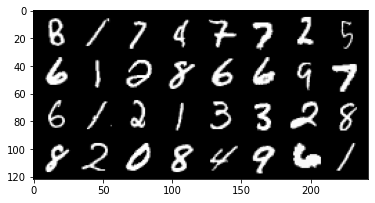

In [57]:
img_grid = torchvision.utils.make_grid(images)
plt.imshow(img_grid.permute(1,2,0).numpy().squeeze(), cmap='gray_r')

We need now, to define the optimization criteria of the network

In [58]:
learning_rate = 0.1
epochs = 4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(input_size=input_size, output_size=output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print('Optimization type: ',device)
print('Device name: ',torch.cuda.get_device_name(0))

Optimization type:  cuda
Device name:  Tesla T4


In [59]:
for epoch in range(epochs):
  running_loss = 0.0
  learning_rate = learning_rate*0.1
  for i, (images, labels) in enumerate(trainloader):
    images = images.view(images.shape[0], -1).to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


    running_loss +=loss.item()
    if i % 200 == 199:
      print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
print('Finished Training')


[1,   200] loss: 0.107
[1,   400] loss: 0.077
[1,   600] loss: 0.076
[1,   800] loss: 0.068
[1,  1000] loss: 0.065
[1,  1200] loss: 0.060
[1,  1400] loss: 0.058
[1,  1600] loss: 0.057
[1,  1800] loss: 0.056
[2,   200] loss: 0.052
[2,   400] loss: 0.052
[2,   600] loss: 0.049
[2,   800] loss: 0.051
[2,  1000] loss: 0.054
[2,  1200] loss: 0.050
[2,  1400] loss: 0.050
[2,  1600] loss: 0.050
[2,  1800] loss: 0.047
[3,   200] loss: 0.047
[3,   400] loss: 0.045
[3,   600] loss: 0.051
[3,   800] loss: 0.046
[3,  1000] loss: 0.044
[3,  1200] loss: 0.046
[3,  1400] loss: 0.043
[3,  1600] loss: 0.045
[3,  1800] loss: 0.045
[4,   200] loss: 0.037
[4,   400] loss: 0.042
[4,   600] loss: 0.044
[4,   800] loss: 0.042
[4,  1000] loss: 0.041
[4,  1200] loss: 0.041
[4,  1400] loss: 0.044
[4,  1600] loss: 0.042
[4,  1800] loss: 0.042
Finished Training


In [60]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 90 %
